# Installing Necessary Libraries

In [1]:
!pip install gensim

# Text Representation Methods
---
1. [Dictionary Lookup](#scrollTo=0b145665)
2. [One-Hot Encoding](#scrollTo=30a4b98b)
3. [Bag-of-Words](#scrollTo=660b7966)
4. [Term Frequency - Inverse Document Frequency (TF-IDF)](#scrollTo=bb9d65da&line=1&uniqifier=1)
5. [Word Embeddings]()

## Dictionary Lookup

A list of sentences, which will act as the dataset for this text representation.

It consists of three sentences, each with varying amount of words.

In [2]:
sentences = [
  "The quick brown fox jumps over the lazy dog",
  "A journey of a thousand miles begins with a single step",
  "To be or not to be that is the question"
]

sentences

['The quick brown fox jumps over the lazy dog',
 'A journey of a thousand miles begins with a single step',
 'To be or not to be that is the question']

Since the defined sentences are not consistently cased, it may lead to "duplicate" words, like "The" and "the".

To remedy this, I transformed the list using the built-in `map()`  Python function. It accepts:
- a function which accepts an element of the given list, In this case, it is given a lambda (anonymous) function that transforms a sentence into its lowercase form using a string's `lower()` method.
- the list that will be iterated through. In this case, it is the `sentences` list.

Since the `map()` function returns an iterator, it needs to be turned back into a list. This is done by passing it to the constructor of the `list` class.

In [3]:
sentences = list(map(lambda sentence: sentence.lower(), sentences))
sentences

['the quick brown fox jumps over the lazy dog',
 'a journey of a thousand miles begins with a single step',
 'to be or not to be that is the question']

A function definition, which extracts unique words in a list of sentences, and returns a dictionary of words with a corresponding unique ID.

Inside the function, a `set` is defined. A `set` is a class built into Python that acts like a list, but it only stores unique values. If the set is updated with a non-unique value, a duplicate entry is not stored. This data structure is used to guarantee that only unique values are kept.

Each sentence in the list is iterated through. Each one is split, with a default delimiter of a whitespace character. Each word is then added to the `unique_words` set, guaranteeing that unique words from each sentence is stored.

Once all sentences have been iterated through, a dictionary is made through Python's dictionary comprehension. Through this method, a dictionary is created by extracting extracting the word, and its index, through Python's `enumarate()` function.

In [4]:
def extract_words(sentences):
    """
    Extracts unique words from a list of sentences and assigns each a numeric ID.
    Args:
        sentences (list of str): A list of sentences.
    Returns:
        dict: A dictionary with numeric IDs as keys and words as values.
    """
    # Split sentences into words and use a set to keep unique words
    unique_words = set()
    for sentence in sentences:
        words = sentence.split()
        unique_words.update(words)

    # Create a dictionary with incrementing numeric IDs as keys
    word_dict = {i: word for i, word in enumerate(unique_words)}

    return word_dict



The previously defined `extract_words()` function is then executed with the list of sentences I defined from an earlier code block.

The generated dictionary is displayed, clearly showing how each word, though unordered, are given a unique numeric ID.

In [5]:
print("Extracted words with their numeric ID")
word_dict = extract_words(sentences)
word_dict

Extracted words with their numeric ID


{0: 'step',
 1: 'of',
 2: 'be',
 3: 'dog',
 4: 'jumps',
 5: 'to',
 6: 'with',
 7: 'fox',
 8: 'not',
 9: 'question',
 10: 'thousand',
 11: 'lazy',
 12: 'the',
 13: 'or',
 14: 'miles',
 15: 'that',
 16: 'is',
 17: 'quick',
 18: 'journey',
 19: 'a',
 20: 'single',
 21: 'begins',
 22: 'over',
 23: 'brown'}

Two functions are defined, one to lookup the word associated by an ID, and another to lookup the ID of a particular word.

---

`lookup_by_id()` accepts:
- a word dictionary, containing a numeric ID and a unique word.
- a numeric ID, which may refer to a word in the given dictionary.

This function iterates through the word dictionary, displaying the word associated to that ID if it finds a match, or a corresponding message if the ID provided is not associated with a word in the dictionary.

---

`lookup_by_word()` accepts:
- a word dictionary, containing a numeric ID and a unique word.
- a word, which may or may not be in the given dictionary.

This function iterates through the word dictionary, displaying the ID associated to the given word. If the word is not found in the dictionary, a corresponding message is displayed.

In [6]:
def lookup_by_id(word_dict, numeric_id):
    # Iterate through the dictionary to find the word
    for id, dict_word in word_dict.items():
        if int(numeric_id) == id:
            return f"The numeric id '{numeric_id}' is used to identify the word: {dict_word}"
    return f"The ID '{numeric_id}' was not found in the dictionary."

def lookup_by_word(word_dict, word):
    # Iterate through the dictionary to find the word
    for id, dict_word in word_dict.items():
        if dict_word == word:
            return f"The word '{word}' has the numeric ID: {id}"

    return f"The word '{word}' was not found in the dictionary."

The following prompts the user for a numeric ID. Once the user enters an input, it is stripped of leading (start) and trailing (end) whitespaces.

The loop first checks if the input corresponds to the word 'exit', which if it matches, then the loop promptly breaks and the execution of the code block is stopped.

If it is not the word 'exit', the loop checks if the `user_input` string is not numeric, using a string's `isnumeric()` method. If the string cannot be successfully parsed into a valid numeric value, a message is displayed to the user, and the loop continues back to the start, prompting the user for another input again.

If the `user_input` string is a valid numeric value, it is passed to the `lookup_by_id()` funtion, along with the previously generated `word_dict` dictionary. The result of the function is promptly stored and displayed to the user, and the user is prompted for another ID again.

In [7]:
while True:
  user_input = input("Enter look up key (or 'exit' to quit): ").strip()

  if user_input.lower() == 'exit':
    print("Exiting the program.")
    break

  if not user_input.isnumeric():
    print("Look up key is not numeric.");
    continue;

  result = lookup_by_id(word_dict, user_input)
  print(f"Result: {result}\n")

Enter look up key (or 'exit' to quit): 10
Result: The numeric id '10' is used to identify the word: thousand

Enter look up key (or 'exit' to quit): 50
Result: The ID '50' was not found in the dictionary.

Enter look up key (or 'exit' to quit): exit
Exiting the program.


## One-Hot Encoding

For one-hot encoding, `numpy`'s array data structure will be used. As such, it is essential that numpy is imported. The alias `np` is used for this module.

In [8]:
import numpy as np

A new list of sentences is defined, consisting of two sentences, both of which have a relatively short length.

In [9]:
sentences = [
  "The cat in the hat",
  "The dog in the house"
]

To ensure the sentences are consistently cased, the list is transformed to its lowercased form.

Details on how this is done is described [here](#scrollTo=HcuGd7t1vHgo&line=1&uniqifier=1)

In [10]:
sentences = list(map(lambda sentence: sentence.lower(), sentences))

Firstly, an empty dictionary is defined named `token_index`.
Then, an integer variable named `counter` is defined with an initial value of 0.

Then, all the sentences are looped through, and each sentence has each word, split for every whitespace character, iterated through. For each word, it is checked if it is not already in the `token_index` dictionary. If it is not, it is added to it, alongside the current value of the `counter` variable. Lastly, the counter variable is incremented by one (1).

Once all sentences have been iterated through, the resulting `token_index` dictionary is printed.

In [11]:
token_index = {}
counter = 0

for sentence in sentences:
  for considered_word in sentence.split():
    if considered_word not in token_index:
      token_index.update({considered_word : counter})
      counter = counter + 1

print(token_index)

{'the': 0, 'cat': 1, 'in': 2, 'hat': 3, 'dog': 4, 'house': 5}


A `max_length` integer variable is defined with a value of six (6). This variable corresponds to what is the maximum length of a sentence is in the `sentences` list.

An array, filled with zeros, is created with numpy's `zeros()` method. It was passed in a tuple with three elements, for the `shape` parameter of the function call. The tuple, having three elements, tells the function generate a three-dimensional array filled with zeroes.

In this case,
- the first dimension of the array should have the amount sentences present in the `sentences` list. In this case, it is two (2).
- the second dimension of the array should is set to be the value of the `max_length` variable. In this case, it is six (6).
- the third dimension of the array should have the maximum value present in the `token_index` dictionary, incremented by one (1). In this case, it is six (6).

In [12]:
max_length = 6
results  = np.zeros(shape = (len(sentences),
                            max_length,
                            max(token_index.values()) + 1))
print("Initial Vectors")
results

Initial Vectors


array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

The following is a nested for-loop, iterating through each word in each sentence in the `sentences` list. Each iteration is accompanied with its corresponding index in the `i` and `j` variable.

For each iteration, it gets the index of the word in the sentence to the one stored in the `token_index` dictionary. For readability, the values of all the variables involved in the iterations are printed.

To create the one-hot encoding vector, the value of one (1) is set to the three-dimensional array, where `i` corresponds to what sentence it is part of, `j` corresponds to what word it is in the sentence, and `index` is what word it is in relation to the all the unique words in the dataset.

In [13]:
for i, sentence in enumerate(sentences):
  for j, considered_word in list(enumerate(sentence.split())):
    index = token_index.get(considered_word)
    print(i,j, sentence, index, considered_word)
    results[i, j, index] = 1
    print(results[i,j])

0 0 the cat in the hat 0 the
[1. 0. 0. 0. 0. 0.]
0 1 the cat in the hat 1 cat
[0. 1. 0. 0. 0. 0.]
0 2 the cat in the hat 2 in
[0. 0. 1. 0. 0. 0.]
0 3 the cat in the hat 0 the
[1. 0. 0. 0. 0. 0.]
0 4 the cat in the hat 3 hat
[0. 0. 0. 1. 0. 0.]
1 0 the dog in the house 0 the
[1. 0. 0. 0. 0. 0.]
1 1 the dog in the house 4 dog
[0. 0. 0. 0. 1. 0.]
1 2 the dog in the house 2 in
[0. 0. 1. 0. 0. 0.]
1 3 the dog in the house 0 the
[1. 0. 0. 0. 0. 0.]
1 4 the dog in the house 5 house
[0. 0. 0. 0. 0. 1.]


For verification, each word is printed alongside what position it is in the sentence, achieved using Python's `enumerate()` function.

In [14]:
for j, considered_word in list(enumerate(sentence.split())):
  print(j, considered_word)

0 the
1 dog
2 in
3 the
4 house


The final vector output of the whole one-hot encoding operation is displayed, alongside the `token_index` dictionary. This lets me easily reference what each column of the encoding vector corresponds to what word in the unique words list.

In [15]:
print("Final Vector Representations:")
print(token_index)
results

Final Vector Representations:
{'the': 0, 'cat': 1, 'in': 2, 'hat': 3, 'dog': 4, 'house': 5}


array([[[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]]])

## Bag-of-Words

To implement bag-of-words text representation, **scikit-learn**'s `CountVectorizer` module is imported.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

A new list of sample sentences is defined.

In [17]:
# Sample sentences
sentences = [
  "The cat in the hat",
  "The dog in the house",
  "The bird in the sky"
]

The `CountVectorizer` class is instantiated, and it is fitted with the `sentences` list to create a bag-of-words representation, using the `fit_transform()` method. The result of this operation is stored in the `bow` variable.

In [18]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()
# Use the fit_transform method to transform the sentences into a bag of words
bow = vectorizer.fit_transform(sentences)

For readability, both the list of sentences, and the amount of sentences fitted to the `CountVectorizer` class is displayed.

Then, the unique words in the vectorizer is displayed using the instance's `vocabulary_` attribute and its `keys()` method.

Lastly, the corresponding word of each column in the output is displayed with the call to the instance's `get_feature_names_out()` method. Alongside it, the bag-of-words representation of the sentences is displayed using the instance's `toarray()` method.

In [19]:

# Print the sentences in the corpus
print("Sentences processed: "+str(sentences)+"\n")
print("Count: " + str(len(sentences)))
# Print the vocabulary (features) of the bag of words
print("Unique Words in the corpus: "+str(list(vectorizer.vocabulary_.keys())))
print("\nBag of Words Conversion:")
print(vectorizer.get_feature_names_out())
# Print the bag of words
print(bow.toarray())


Sentences processed: ['The cat in the hat', 'The dog in the house', 'The bird in the sky']

Count: 3
Unique Words in the corpus: ['the', 'cat', 'in', 'hat', 'dog', 'house', 'bird', 'sky']

Bag of Words Conversion:
['bird' 'cat' 'dog' 'hat' 'house' 'in' 'sky' 'the']
[[0 1 0 1 0 1 0 2]
 [0 0 1 0 1 1 0 2]
 [1 0 0 0 0 1 1 2]]


For a cleaner display of the result, the **pandas** library was imported to use its `DataFrame` class.

The `DataFrame` was created using the results of the `toarray()` method, and the names of the columns are defined using the results of the `get_feature_names_out()` method of the `CountVectorizer` instance.

In [20]:
import pandas as pd

bow_df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words as DataFrame:")
bow_df

Bag of Words as DataFrame:


,bird,cat,dog,hat,house,in,sky,the
0,0,1,0,1,0,1,0,2
1,0,0,1,0,1,1,0,2
2,1,0,0,0,0,1,1,2


## Term Frequency - Inverse Document Frequency (TF-IDF)
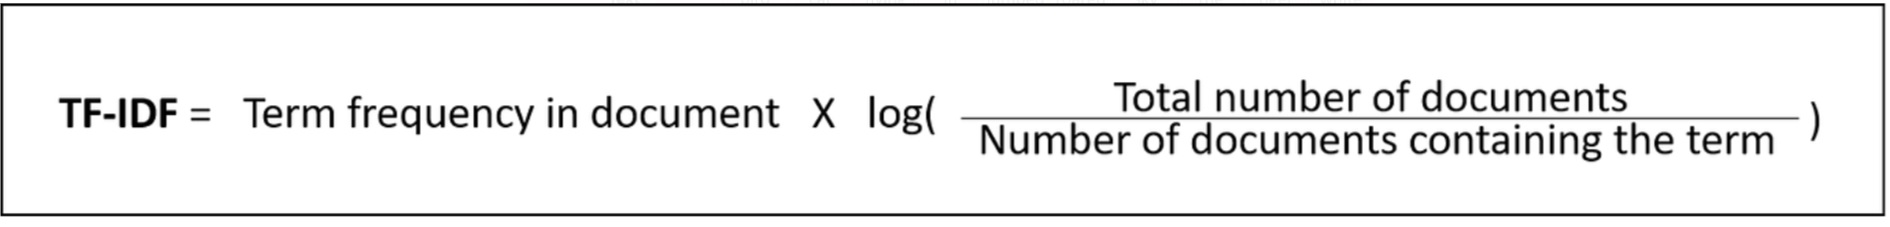

To enable TF-IDF text representation, the `TfidfVectorizer` class of **scikit-learn** had to be imported.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

A new list of documents is defined which will be fitted to the TF-IDF Vectorizer.

In [22]:
documents = [
  "This is the first document.",
  "This document is the second document.",
  "And this is the third one.",
]

The `TfidfVectorizer` class is instantiated, and it is fitted with the `documents` list to create a TF-IDF text representation, using the `fit_transform()` method. The result of this operation is stored in the `X_tfidf` variable.

In [23]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

The results of the TF-IDF vectorization is displayed, using the instance's `toarray()` method, alongside each column's name, using the instance's `get_feature_names_out()` method.

In [24]:
print("Final Text Representation:")
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", X_tfidf.toarray())

Final Text Representation:
Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Matrix:
 [[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]


For a cleaner display of results, **pandas** library's `DataFrame` class was used.

For the details on its implementation, refer to [this explanation.](#scrollTo=ghjQQIZ08Ehy&line=3&uniqifier=1)

In [25]:
import pandas as pd

X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_tfidf_df

,and,document,first,is,one,second,the,third,this
0,0.00000,0.469417,0.617227,0.364544,0.00000,0.000000,0.364544,0.00000,0.364544
1,0.00000,0.728445,0.000000,0.282851,0.00000,0.478909,0.282851,0.00000,0.282851
2,0.49712,0.000000,0.000000,0.293607,0.49712,0.000000,0.293607,0.49712,0.293607


## Word Embeddings (Word2Vec + Continuous Bag-Of-Words)

To allow for word embeddings representation functionality, the following libraries were imported:

- `Word2Vec` from **gensim** - exposes the class that implements the functionality of word embeddings using Continuous Bag-of-Words (CBOW).
- `word_tokenize` from **nltk** - a function that tokenizes a document into a list of words (tokens).
- `pyplot` aliased as `plt` from **matplotlib** - implements visualization of data through graphs and charts.
- `nltk` - exposes core library functionality, like downloading corpus used by the library's other methods.

In [26]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import nltk

The `punkt_tab` corpus from the **nltk** library is downloaded, which is used by the `word_tokenize()` function.

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

A new list of sentences is defined, which is then subsequently transformed to be all lowercased.

Details on how this is done is described [here](#scrollTo=HcuGd7t1vHgo&line=1&uniqifier=1)

In [28]:
sentences = [
  "The quick brown fox jumps over the lazy dog",
  "A journey of a thousand miles begins with a single step",
  "To be or not to be that is the question"
]

sentences = list(map(lambda sentence: sentence.lower(), sentences))
sentences

['the quick brown fox jumps over the lazy dog',
 'a journey of a thousand miles begins with a single step',
 'to be or not to be that is the question']

The sentences are then iterated through one-by-one, where each sentence is tokenized. The result of each operation is stored in the `data` variable.

In [29]:
data = list(map(lambda sentence: word_tokenize(sentence), sentences))
data

[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
 ['a',
  'journey',
  'of',
  'a',
  'thousand',
  'miles',
  'begins',
  'with',
  'a',
  'single',
  'step'],
 ['to', 'be', 'or', 'not', 'to', 'be', 'that', 'is', 'the', 'question']]

The `Word2Vec` class is instantiated with the following parameters:
- `data` - is the data that will be fitted to the model.
- `min_count` - is the minimum frequency of a word for it to be included in the model.
- `vector_size` - is the maximum size of the resulting vector.
- `window` - the amount of words "around" a particular that will be looked at by the model for context.

The corresponding trained model is stored in the `word2vec_model` variable.

In [30]:
word2vec_model = Word2Vec(
    data,
    min_count=1,
    vector_size=100,
    window=5,
)

Firstly, the valid words that was found by the model is stored, accessed from the model instance's `wv` attribute and its `index_to_key` attribute.

An infinite loop is started, prompting the user for two words. If the user ever enters a word not found in the model's valid words, it tells the user and loops back to the start.

Once the user successfully enters two valid words, it displays the two word's similarity through the model instance's `similarity()` method under its `wv` attribute. This displays how similar the words are according to the context words around it in the dataset. A positive score, approaching one (1) tells that the words are pretty similar, while a negative score, approaching negative one (-1) tells that the words are contextually different.

In [31]:
valid_words = word2vec_model.wv.index_to_key

while True:
  word1 = input('Enter first word: ')

  if word1 not in valid_words:
    print(f'{word1} is not a valid word')
    continue

  word2 = input('Enter second word: ')

  if word2 not in valid_words:
    print(f'{word2} is not a valid word')
    continue

  print('Similarity:', word2vec_model.wv.similarity(word1, word2))
  break


Enter first word: the
Enter second word: of
Similarity: -0.027850127


`visualize_embeddings()` accepts:
- embeddings, a keyed collection (e.g., Word2Vec’s .wv) that maps each word to its corresponding vector representation.
- words, a list of words whose embeddings will be visualized.

This function applies t-distributed Stochastic Neighbor Embedding (t-SNE) to reduce the high-dimensional word embeddings into two dimensions for visualization. It first creates a TSNE object with two output components, a fixed random seed for reproducibility, and a perplexity based on the number of words to display. It then extracts the vector for each word, transforms them into 2D coordinates, and plots them using Matplotlib. Each word is marked as a point on the scatter plot and annotated with its label.

The code then obtains the list of vocabulary words from the trained Word2Vec model and stored in the `word2vec_words` variable.

Finally, it calls visualize_embeddings() with the Word2Vec embeddings and vocabulary list, producing a scatter plot of the words in 2D space, where spatial proximity reflects similarity in the embedding space.

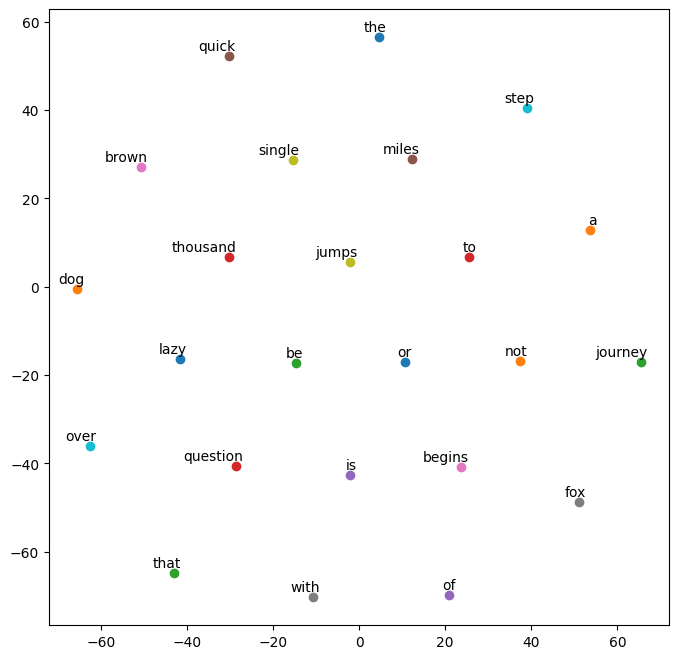

In [32]:
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For Word2Vec
word2vec_words = word2vec_model.wv.index_to_key
visualize_embeddings(word2vec_model.wv, word2vec_words)